In [36]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
df = pd.read_csv('data/meningitis_data.csv')
df2 = pd.read_csv('data/ext_meningitis_data_cleaned.csv')
df = pd.concat([df, df2], ignore_index=True)
df.head()

,record_id,redcap_repeat_instrument,redcap_repeat_instance,redcap_data_access_group,specimenidnumber,medicalwardid,medicalwardid_sysid,imported_med_rec_id,countrycode,sentinelsite,...,checkdate4,who_afro_site_laboratory_complete,latexagglutination,latexagglutinationres,binax_done,csf_binax_result,anyothertestperformed,othertestresult,sitelabfinalresult,target
0,126759.0,NaN,NaN,tog_chu,000008L,TOG_CHU_2010_008P,TOG_CHU_2010_126759,TOG_CHU_2010_008P,TOG,CHU,...,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1
1,126760.0,NaN,NaN,tog_chu,000009L,TOG_CHU_2010_009P,TOG_CHU_2010_126760,TOG_CHU_2010_009P,TOG,CHU,...,NaN,2.0,1.0,2.0,NaN,NaN,6.0,NaN,NaN,1
2,126763.0,NaN,NaN,tog_chu,000012L,TOG_CHU_2010_012P,TOG_CHU_2010_126763,TOG_CHU_2010_012P,TOG,CHU,...,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1
3,126779.0,NaN,NaN,tog_chu,000028L,TOG_CHU_2010_O28P,TOG_CHU_2010_126779,TOG_CHU_2010_O28P,TOG,CHU,...,NaN,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1
4,126788.0,NaN,NaN,tog_chu,000035L,TOG_CHU_2010_037P,TOG_CHU_2010_126788,TOG_CHU_2010_037P,TOG,CHU,...,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1


In [38]:
selected_columns = [
    'age',                      # Patient age
    'sexofthepatient',          # Gender
    'whitecellcount',           # CSF WBC count
    'csfproteinresult',         # CSF protein level
    'csfglucoseresult',         # CSF glucose level
    'csf_gram_resul',           # Gram stain result
    'csfcultureresults',        # CSF culture result
    'presenceofseizure',        # Seizure presence
    'neckstiffness',            # Neck stiffness
    'historyoffever',           # Fever history
    'alteredconsciousness',     # Consciousness level
    'bulgingfontanel',          # Fontanel bulging (infants)
    'mening_received',          # Meningitis vaccine received
    'hibvaccine',               # Hib vaccine received
    'pneumoduringcampaign',     # Pneumococcal vaccine during campaign
    'target'                    # Label: bacterial meningitis (1 = yes, 0 = no)
]

df = df[selected_columns]
df.head()

,age,sexofthepatient,whitecellcount,csfproteinresult,csfglucoseresult,csf_gram_resul,csfcultureresults,presenceofseizure,neckstiffness,historyoffever,alteredconsciousness,bulgingfontanel,mening_received,hibvaccine,pneumoduringcampaign,target
0,NaN,F,1.0,NaN,NaN,1.0,1.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,NaN,1
1,NaN,F,3.0,NaN,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,NaN,1
2,NaN,F,1.0,NaN,NaN,1.0,5.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,NaN,1
3,NaN,M,3.0,NaN,NaN,1.0,1.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,NaN,1
4,NaN,M,1.0,NaN,NaN,1.0,1.0,2.0,2.0,2.0,2.0,2.0,NaN,1.0,NaN,1


In [39]:
df.shape

(3318, 16)

In [40]:
df['age'].fillna(df['age'].mean(), inplace=True)

C:\Users\willa\AppData\Local\Temp\ipykernel_8912\1503503937.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)


In [41]:
df['sexofthepatient'].fillna('M', inplace=True)

C:\Users\willa\AppData\Local\Temp\ipykernel_8912\3947805924.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sexofthepatient'].fillna('M', inplace=True)


In [42]:
df['whitecellcount'].fillna(df['whitecellcount'].mean(), inplace=True)

C:\Users\willa\AppData\Local\Temp\ipykernel_8912\3884973515.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['whitecellcount'].fillna(df['whitecellcount'].mean(), inplace=True)


In [43]:
df['csfproteinresult'].fillna(df['csfproteinresult'].mean(), inplace=True)

C:\Users\willa\AppData\Local\Temp\ipykernel_8912\377319724.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['csfproteinresult'].fillna(df['csfproteinresult'].mean(), inplace=True)


In [44]:
df['csfglucoseresult'].fillna(df['csfglucoseresult'].mean(), inplace=True)

C:\Users\willa\AppData\Local\Temp\ipykernel_8912\4093395083.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['csfglucoseresult'].fillna(df['csfglucoseresult'].mean(), inplace=True)


In [45]:
df['csf_gram_resul'].fillna(df['csf_gram_resul'].mode(), inplace=True)

C:\Users\willa\AppData\Local\Temp\ipykernel_8912\1602795085.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['csf_gram_resul'].fillna(df['csf_gram_resul'].mode(), inplace=True)


In [46]:
df.head()

,age,sexofthepatient,whitecellcount,csfproteinresult,csfglucoseresult,csf_gram_resul,csfcultureresults,presenceofseizure,neckstiffness,historyoffever,alteredconsciousness,bulgingfontanel,mening_received,hibvaccine,pneumoduringcampaign,target
0,16.764518,F,1.0,34.219231,10.227586,1.0,1.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,NaN,1
1,16.764518,F,3.0,34.219231,10.227586,1.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,NaN,1
2,16.764518,F,1.0,34.219231,10.227586,1.0,5.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,NaN,1
3,16.764518,M,3.0,34.219231,10.227586,1.0,1.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,NaN,1
4,16.764518,M,1.0,34.219231,10.227586,1.0,1.0,2.0,2.0,2.0,2.0,2.0,NaN,1.0,NaN,1


In [47]:
df['csfcultureresults'].fillna(df['csfcultureresults'].mean(), inplace=True)

C:\Users\willa\AppData\Local\Temp\ipykernel_8912\2191990142.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['csfcultureresults'].fillna(df['csfcultureresults'].mean(), inplace=True)


In [48]:
df['presenceofseizure'].fillna(df['presenceofseizure'].mean(), inplace=True)

C:\Users\willa\AppData\Local\Temp\ipykernel_8912\3359267770.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['presenceofseizure'].fillna(df['presenceofseizure'].mean(), inplace=True)


In [49]:
df['neckstiffness'].fillna(df['neckstiffness'].mean(), inplace=True)

C:\Users\willa\AppData\Local\Temp\ipykernel_8912\1781034832.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['neckstiffness'].fillna(df['neckstiffness'].mean(), inplace=True)


In [50]:
df['historyoffever'].fillna(df['historyoffever'].mean(), inplace=True)

C:\Users\willa\AppData\Local\Temp\ipykernel_8912\188665431.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['historyoffever'].fillna(df['historyoffever'].mean(), inplace=True)


In [51]:
df['alteredconsciousness'].fillna(df['alteredconsciousness'].mean(), inplace=True)

C:\Users\willa\AppData\Local\Temp\ipykernel_8912\3630440958.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['alteredconsciousness'].fillna(df['alteredconsciousness'].mean(), inplace=True)


In [52]:
df['bulgingfontanel'].fillna(df['bulgingfontanel'].mean(), inplace=True)

C:\Users\willa\AppData\Local\Temp\ipykernel_8912\401386544.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bulgingfontanel'].fillna(df['bulgingfontanel'].mean(), inplace=True)


In [53]:
df['mening_received'].fillna(df['mening_received'].mean(), inplace=True)

C:\Users\willa\AppData\Local\Temp\ipykernel_8912\629536444.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['mening_received'].fillna(df['mening_received'].mean(), inplace=True)


In [54]:
df.head()

,age,sexofthepatient,whitecellcount,csfproteinresult,csfglucoseresult,csf_gram_resul,csfcultureresults,presenceofseizure,neckstiffness,historyoffever,alteredconsciousness,bulgingfontanel,mening_received,hibvaccine,pneumoduringcampaign,target
0,16.764518,F,1.0,34.219231,10.227586,1.0,1.0,2.0,2.0,2.0,2.0,2.0,4.450212,2.0,NaN,1
1,16.764518,F,3.0,34.219231,10.227586,1.0,2.0,2.0,2.0,2.0,2.0,2.0,4.450212,2.0,NaN,1
2,16.764518,F,1.0,34.219231,10.227586,1.0,5.0,2.0,2.0,2.0,2.0,2.0,4.450212,2.0,NaN,1
3,16.764518,M,3.0,34.219231,10.227586,1.0,1.0,2.0,2.0,2.0,2.0,2.0,4.450212,2.0,NaN,1
4,16.764518,M,1.0,34.219231,10.227586,1.0,1.0,2.0,2.0,2.0,2.0,2.0,4.450212,1.0,NaN,1


In [55]:
df['hibvaccine'].fillna(df['hibvaccine'].mean(), inplace=True)

C:\Users\willa\AppData\Local\Temp\ipykernel_8912\476977606.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['hibvaccine'].fillna(df['hibvaccine'].mean(), inplace=True)


In [56]:
df['pneumoduringcampaign'].fillna(df['pneumoduringcampaign'].mean(), inplace=True)

C:\Users\willa\AppData\Local\Temp\ipykernel_8912\271376593.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['pneumoduringcampaign'].fillna(df['pneumoduringcampaign'].mean(), inplace=True)


In [57]:
df['sexofthepatient'] = df['sexofthepatient'].map({'F': 0, 'M': 1})

In [58]:
df['target'].isna().sum()

np.int64(0)

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X = df.drop(columns=['target'])
y = df['target']  

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [62]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [63]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       375
           1       0.89      0.82      0.86       289

    accuracy                           0.88       664
   macro avg       0.88      0.87      0.88       664
weighted avg       0.88      0.88      0.88       664



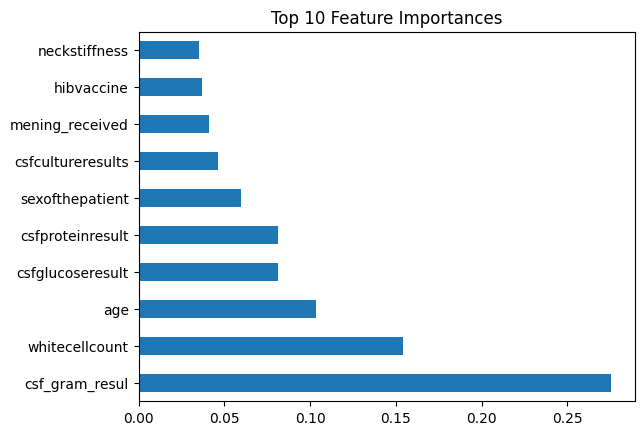

In [64]:
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.show()


In [65]:
# import joblib
# joblib.dump(model, 'meningitis_model.pkl')

In [66]:
# df.to_csv('meningitis_data_cleaned.csv', index=False)
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2],
#     'class_weight': ['balanced']
# }

# grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, n_jobs=-1)
# grid.fit(X_train, y_train)

# print("Best Parameters:", grid.best_params_)
# print("Best Score:", grid.best_score_)

# y_pred = grid.predict(X_test)
# print(classification_report(y_test, y_pred))